# Knn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

reading the data 

In [2]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


splitting it into test and trainning data

In [3]:
X = df.iloc[:, 1:785].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

len(X_train)

33600

Trainning the model

In [4]:
from sklearn.neighbors import KNeighborsClassifier
tree_model = KNeighborsClassifier(n_neighbors=1)
tree_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Applying the model on the test data

In [5]:
predicted = tree_model.predict(X_test)
expected = y_test
print(predicted[0:50])
print(expected[0:50])

[3 6 9 5 6 5 6 0 0 1 7 1 5 7 8 1 1 5 9 6 9 2 2 8 4 6 2 5 4 4 8 2 8 9 3 8 9
 5 2 7 6 3 1 7 9 7 4 2 5 0]
[3 6 9 5 6 5 6 0 0 1 7 1 5 7 8 1 1 5 9 6 9 2 2 8 4 6 2 5 4 4 8 2 8 9 3 8 4
 5 2 7 6 3 1 7 9 7 4 2 5 0]


**Measuring the performace of the model**

In [6]:
print("Accuracy:", tree_model.score(X_test, y_test))

('Accuracy:', 0.9709523809523809)


In [7]:
print("confusion_matrix:")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(data=cm, columns=range(10), index=range(10))

cm_df

confusion_matrix:


,0,1,2,3,4,5,6,7,8,9
0,803,0,0,1,1,1,5,0,1,1
1,0,952,3,1,0,0,1,2,2,0
2,7,2,836,2,1,0,2,7,3,0
3,0,0,3,832,0,14,1,6,3,4
4,1,7,0,0,792,0,3,3,0,21
5,3,1,0,11,1,730,8,0,1,1
6,1,1,0,0,1,2,836,0,0,0
7,0,7,5,1,3,0,0,877,0,6
8,0,5,3,13,2,8,3,2,726,6
9,4,2,0,2,13,2,1,16,0,772


In [8]:
print("Classification report:")
from sklearn.metrics import classification_report 
print(classification_report(y_test, predicted))

Classification report:
             precision    recall  f1-score   support

          0       0.98      0.99      0.98       813
          1       0.97      0.99      0.98       961
          2       0.98      0.97      0.98       860
          3       0.96      0.96      0.96       863
          4       0.97      0.96      0.97       827
          5       0.96      0.97      0.96       756
          6       0.97      0.99      0.98       841
          7       0.96      0.98      0.97       899
          8       0.99      0.95      0.97       768
          9       0.95      0.95      0.95       812

avg / total       0.97      0.97      0.97      8400



**Viewing the the ones that predicted wrong**

In [13]:
(y_test != predicted).sum()

841

IndexError: index 244 is out of bounds for axis 0 with size 244

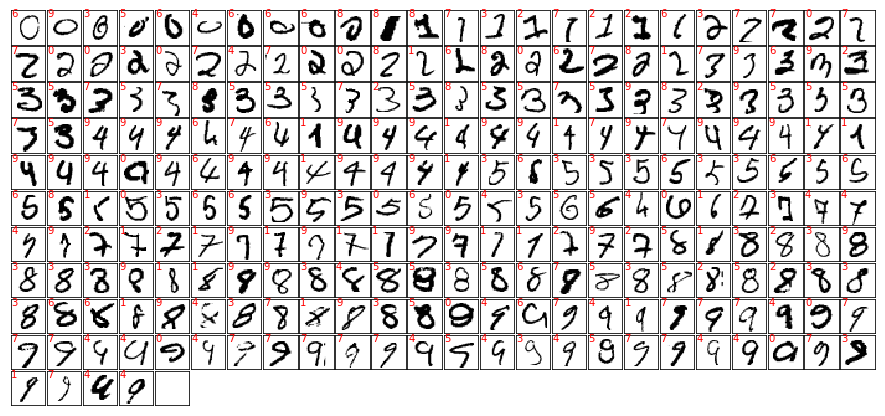

In [9]:
wrong = X_test[y_test != predicted]
wrong_pred = predicted[y_test != predicted]
wrong_exp = y_test[y_test != predicted]

fig = plt.figure(figsize=(12, 12))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#sorting the output by number to make them easy to v
index_sort = wrong_exp.argsort()

# plot the digits: each image is 28x28 pixels
for i in range(288):
    ax = fig.add_subplot(24, 24, i + 1, xticks=[], yticks=[])
    ax.imshow(wrong[index_sort].reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    ax.text(0, 5, str(wrong_pred[index_sort][i]), color='red')
    
    # label the image with the target value
    #if predicted[i] == expected[i]:
    #    ax.text(0, 7, str(predicted[i]), color='green')
    #else:
    #    ax.text(0, 7, str(predicted[i]), color='red')


## k-NN improvments

In [12]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Identifying the center of each class

In [16]:
df_copy = df.copy()

centers = df_copy.groupby(['label'], as_index=False).mean()

centers

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.846626,0.939105,0.397182,0.086344,0.118155,0.027267,0.0,0.0,0.0,0.0
8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.258596,0.187440,0.174546,0.111748,0.048711,0.000000,0.0,0.0,0.0,0.0


In [18]:
Xc = centers.iloc[:, 1:785].values
yc = centers.iloc[:, 0].values

center_model = KNeighborsClassifier(n_neighbors=1)
center_model.fit(Xc, yc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Applying the model on the test data

In [21]:
predicted = center_model.predict(X_test)
expected = y_test
print(predicted[0:50])
print(expected[0:50])

[3 6 9 3 6 9 6 8 0 1 7 1 5 7 8 1 1 5 9 6 9 1 2 8 4 6 2 1 4 4 8 2 8 9 1 8 4
 5 2 7 6 3 1 7 9 7 9 2 3 0]
[3 6 9 5 6 5 6 0 0 1 7 1 5 7 8 1 1 5 9 6 9 2 2 8 4 6 2 5 4 4 8 2 8 9 3 8 4
 5 2 7 6 3 1 7 9 7 4 2 5 0]


In [22]:
print("Accuracy:", center_model.score(X_test, y_test))

('Accuracy:', 0.8139285714285714)


In [23]:
print("Classification report:")
from sklearn.metrics import classification_report 
print(classification_report(y_test, predicted))

Classification report:
             precision    recall  f1-score   support

          0       0.90      0.87      0.89       813
          1       0.76      0.98      0.86       961
          2       0.88      0.77      0.82       860
          3       0.75      0.76      0.76       863
          4       0.80      0.82      0.81       827
          5       0.73      0.69      0.71       756
          6       0.88      0.86      0.87       841
          7       0.91      0.85      0.88       899
          8       0.80      0.73      0.76       768
          9       0.75      0.76      0.75       812

avg / total       0.82      0.81      0.81      8400



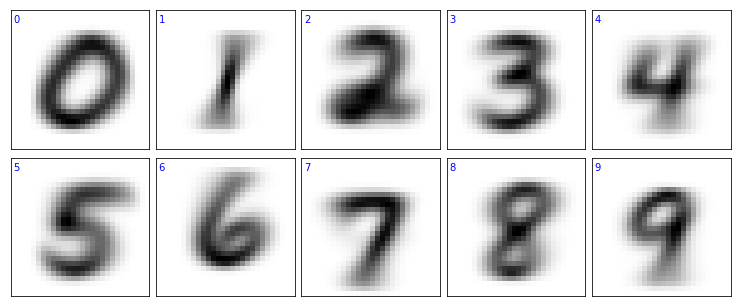

In [32]:
fig = plt.figure(figsize=(10, 4))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(Xc.reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    ax.text(0, 2, str(i), color='blue')

In [48]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.76, random_state=0 )

len(X_train_s)

10080

In [49]:
s_model = KNeighborsClassifier(n_neighbors=1)
s_model.fit(X_train_s, y_train_s)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [50]:
predicted = s_model.predict(X_test)
expected = y_test
print(predicted[0:50])
print(expected[0:50])

[3 6 9 5 6 9 6 0 0 1 7 1 5 7 8 1 1 5 9 6 9 2 2 8 4 6 2 5 4 4 8 2 8 9 3 8 9
 5 2 7 6 3 1 7 9 7 4 2 5 0]
[3 6 9 5 6 5 6 0 0 1 7 1 5 7 8 1 1 5 9 6 9 2 2 8 4 6 2 5 4 4 8 2 8 9 3 8 4
 5 2 7 6 3 1 7 9 7 4 2 5 0]


In [51]:
print("Accuracy:", s_model.score(X_test, y_test))

('Accuracy:', 0.9482142857142857)
